# Caçador de OVNIs

Em que estado e horário é mais "fácil" de avistar um OVNI nos EUA?

### Importando o que importa

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.get_configdir()
mpl.style.use('seaborn-dark')
plt.rcParams["figure.figsize"] = (12,6)

import warnings
warnings.simplefilter(action='ignore')

### Lendo o arquivo com todas as ocorrências

In [2]:
df = pd.read_json('ovnis_crawler/ovnis.json')

### Visualizando uma amostra dos dados

In [3]:
df.head()

,occurred,city,state,shape,duration,summary,posted
0,12/19/21 23:00,Branford,CT,Circle,None,See craft every evening when I get out of work...,12/19/21
1,12/19/21 00:15,Deltona,FL,Changing,"1 minute, 9 seconds video",I was on Ring app in house and saw incredible ...,12/19/21
2,12/18/21 21:45,Long Beach,CA,Triangle,3-5 seconds,3 Boomerang shaped craft flying in formation,12/19/21
3,12/18/21 00:00,Charlotte,NC,Cigar,still active 12:35am,"flying stick, the ends of it brighter. Recorde...",12/19/21
4,12/17/21 23:30,Traver,CA,Oval,2 hours,((HOAX)) near the Foster farms feed mill in T...,12/19/21


### Renomeando as colunas

In [4]:
df.columns = ['ocorrido', 'cidade', 'estado', 'forma', 'duração', 'relato', 'postado']

### Convertendo as colunas com datas de <code>string</code> para <code>datetime</code>

In [5]:
df['ocorrido'] = pd.to_datetime(df['ocorrido'])
df['postado'] = pd.to_datetime(df['postado'])

In [6]:
df.head()

,ocorrido,cidade,estado,forma,duração,relato,postado
0,2021-12-19 23:00:00,Branford,CT,Circle,None,See craft every evening when I get out of work...,2021-12-19
1,2021-12-19 00:15:00,Deltona,FL,Changing,"1 minute, 9 seconds video",I was on Ring app in house and saw incredible ...,2021-12-19
2,2021-12-18 21:45:00,Long Beach,CA,Triangle,3-5 seconds,3 Boomerang shaped craft flying in formation,2021-12-19
3,2021-12-18 00:00:00,Charlotte,NC,Cigar,still active 12:35am,"flying stick, the ends of it brighter. Recorde...",2021-12-19
4,2021-12-17 23:30:00,Traver,CA,Oval,2 hours,((HOAX)) near the Foster farms feed mill in T...,2021-12-19


### Limpando os relatos com dados faltantes

In [7]:
df_dropped = df.dropna()

In [8]:
df_dropped.head()

,ocorrido,cidade,estado,forma,duração,relato,postado
1,2021-12-19 00:15:00,Deltona,FL,Changing,"1 minute, 9 seconds video",I was on Ring app in house and saw incredible ...,2021-12-19
2,2021-12-18 21:45:00,Long Beach,CA,Triangle,3-5 seconds,3 Boomerang shaped craft flying in formation,2021-12-19
3,2021-12-18 00:00:00,Charlotte,NC,Cigar,still active 12:35am,"flying stick, the ends of it brighter. Recorde...",2021-12-19
4,2021-12-17 23:30:00,Traver,CA,Oval,2 hours,((HOAX)) near the Foster farms feed mill in T...,2021-12-19
5,2021-12-17 22:30:00,Butte,MT,Circle,15 minutes,Saw orb that moved around the moon and got pic...,2021-12-19


In [9]:
df.sort_values(by="ocorrido", ascending=False)

,ocorrido,cidade,estado,forma,duração,relato,postado
12133,2071-12-25 08:00:00,Oxnard,CA,Sphere,2 seconds,big blue fireball very low,2006-05-15
12134,2071-12-20 16:00:00,Mountainview,CA,Triangle,10 minutes,"Particially hidden, behind cloud, hovering cra...",2004-12-03
12161,2071-11-26 20:02:00,Sundsanvik (Sweden),None,Disk,10min,Golden Light-White Syncron Light-Ruby Red Clou...,2011-03-10
12162,2071-11-22 08:05:00,Vindoen Island (Sweden),OH,Disk,9minutes,BIG-one kilometer wide Yellowlighted UFO-Discu...,2006-12-07
12163,2071-11-17 21:00:00,Knox,NY,Disk,1 minute,UFO hovers above and shines a bright beam of l...,2008-03-31
...,...,...,...,...,...,...,...
12180,1972-01-18 21:00:00,Blacksburg,SC,Light,2 hours,"In the early 70's, four of us chased lights in...",1999-04-26
12181,1972-01-15 23:00:00,Malmstrom AFB,MT,Unknown,mult hrs,UFO on USAF base 1972 or 1973,2002-09-28
12182,1972-01-05 19:30:00,Gering,NE,Light,2-3 minutes,"Fast moving light, darting then hovering in sk...",2005-04-16
12183,1972-01-01 20:00:00,Huntsville,AL,Unknown,2 minutes,"3 lights, light speed, no sound, 90 degree turn",2005-04-16


In [10]:
selector_non_future_occurrences = df_dropped['ocorrido'] < pd.Timestamp.now()
df_dropped = df_dropped[selector_non_future_occurrences].sort_values(by="ocorrido", ascending=False)
df_dropped.head()

,ocorrido,cidade,estado,forma,duração,relato,postado
1,2021-12-19 00:15:00,Deltona,FL,Changing,"1 minute, 9 seconds video",I was on Ring app in house and saw incredible ...,2021-12-19
2,2021-12-18 21:45:00,Long Beach,CA,Triangle,3-5 seconds,3 Boomerang shaped craft flying in formation,2021-12-19
3,2021-12-18 00:00:00,Charlotte,NC,Cigar,still active 12:35am,"flying stick, the ends of it brighter. Recorde...",2021-12-19
4,2021-12-17 23:30:00,Traver,CA,Oval,2 hours,((HOAX)) near the Foster farms feed mill in T...,2021-12-19
5,2021-12-17 22:30:00,Butte,MT,Circle,15 minutes,Saw orb that moved around the moon and got pic...,2021-12-19


### Agrupando os resultados por estado

In [11]:
ocorrencias_por_estado = df_dropped.groupby('estado')['ocorrido'].count()

In [12]:
ocorrencias_por_estado.sort_values(ascending=False, inplace=True)

### Plotando os 10 estados com mais ocorrências

<AxesSubplot:xlabel='estado'>

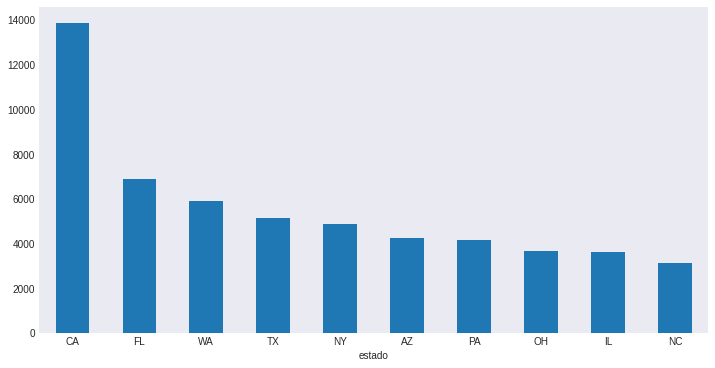

In [13]:
ocorrencias_por_estado.head(10).plot.bar(rot=0)

### Extraindo um subset com somente com os dados da Califórnia

In [14]:
selector = df_dropped['estado'] == "CA"

In [15]:
california = df_dropped[selector]

In [16]:
california.head()

,ocorrido,cidade,estado,forma,duração,relato,postado
2,2021-12-18 21:45:00,Long Beach,CA,Triangle,3-5 seconds,3 Boomerang shaped craft flying in formation,2021-12-19
4,2021-12-17 23:30:00,Traver,CA,Oval,2 hours,((HOAX)) near the Foster farms feed mill in T...,2021-12-19
10,2021-12-16 17:15:00,San Diego,CA,Triangle,2-3 minutes,Saw triangular shaped object,2021-12-19
13,2021-12-15 21:45:00,Visalia,CA,Light,2 minutes,Viewed some red lights in the sky appearing to...,2021-12-19
49,2021-12-11 23:00:00,San Leandro,CA,Light,30 minutes,A light in the sky over San Francisco Bay in c...,2021-12-19


### Extraindo a hora de cada ocorrência e adicionando em uma nova coluna

In [17]:
california['hora'] = california['ocorrido'].dt.hour

### Plotando um <code>histograma</code> para examinar a distribuição de ocorrências

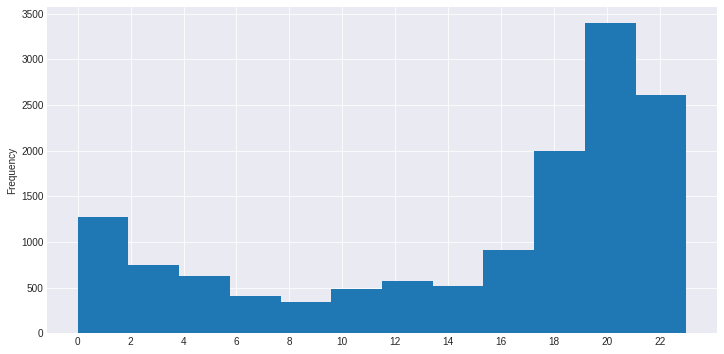

In [18]:
hora_hist = california['hora'].plot.hist(bins=12, grid=True)
plt.xticks(range(california['hora'].min(), california['hora'].max()+1, 2))
plt.show()

# Desafio

### Qual os 5 formatos de OVNI mais comuns nos relatos?

In [19]:
df_dropped.groupby('forma')['ocorrido'].count().sort_values(ascending=False).head()

forma
Light       25139
Circle      12557
Triangle    11113
Fireball     8791
Unknown      8246
Name: ocorrido, dtype: int64

### Qual o horário mais difícil para avistarmos um OVNI em forma de Charuto?

In [20]:
selector = df_dropped['forma'] == 'Cigar'

In [21]:
charutos = df_dropped[selector]

In [22]:
charutos.head(3)

,ocorrido,cidade,estado,forma,duração,relato,postado
3,2021-12-18 00:00:00,Charlotte,NC,Cigar,still active 12:35am,"flying stick, the ends of it brighter. Recorde...",2021-12-19
39,2021-12-13 16:00:00,Minot,ME,Cigar,6 minutes,Craft seen entering atmosphere,2021-12-19
134327,2021-11-11 18:18:00,North Las Vegas,NV,Cigar,30 seconds,"Cigar shaped bright lite craft, dropping squra...",2021-11-15


In [23]:
charutos['hora'] = charutos['ocorrido'].dt.hour

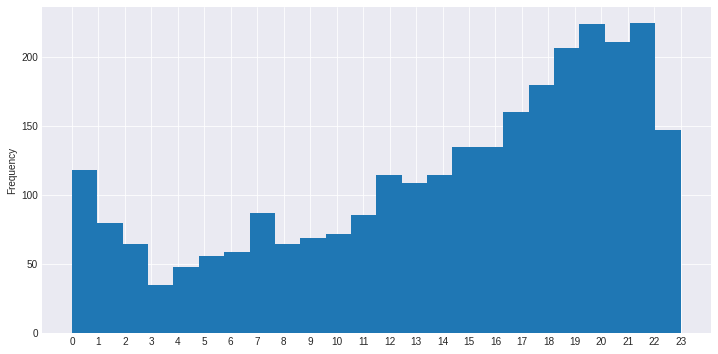

In [24]:
hora_hist = charutos['hora'].plot.hist(bins=24, grid=True)
plt.xticks(range(charutos['hora'].min(), charutos['hora'].max()+1, 1))
plt.show()